In [1]:
# Package imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import sklearn

from zipfile import ZipFile

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
train_df = pd.read_csv('./gdrive/My Drive/Colab Notebooks/expedia/train.csv')

In [5]:
train_df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [6]:
train_df.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        9412233
visitor_hist_adr_usd           9409918
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                14630
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           2178380
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      9281966
orig_destination_distance

In [0]:
train_df.drop(
    ['visitor_hist_starrating',
     'visitor_hist_adr_usd',
     'prop_review_score',
     'prop_location_score2',
     'srch_query_affinity_score',
     'orig_destination_distance',
     'comp1_rate',
     'comp1_inv',
     'comp1_rate_percent_diff',
     'comp2_rate',
     'comp2_inv',
     'comp2_rate_percent_diff',
     'comp3_rate',
     'comp3_inv',
     'comp3_rate_percent_diff',
     'comp4_rate',
     'comp4_inv',
     'comp4_rate_percent_diff',
     'comp5_rate',
     'comp5_inv',
     'comp5_rate_percent_diff',
     'comp6_rate',
     'comp6_inv',
     'comp6_rate_percent_diff',
     'comp7_rate',
     'comp7_inv',
     'comp7_rate_percent_diff',
     'comp8_rate',
     'comp8_inv',
     'comp8_rate_percent_diff',
     'gross_bookings_usd'
    ],
    axis=1,
    inplace=True
)

In [0]:
def pca_function(df, threshold, show_scree_plot=True, scaled=False, excluded_cols=None):
  
  # Library imports
  from sklearn.decomposition import PCA 
  from sklearn.preprocessing import StandardScaler
  
  X = df.copy()
  
  if excluded_cols != None:
    X = X.drop(columns=excluded_cols)
    
  # Use only the numeric columns that have not been excluded
  numeric_cols = X.select_dtypes(include='number').columns.tolist()
  X = X[numeric_cols].values
  
  if scaled == False:
    # Scale the data:
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X)
  else:
    scaled_X = X
    
  # Calc the Principal Component Variance
  n = len(numeric_cols)
  covar_matrix = PCA(n_components = n)
  covar_matrix.fit(scaled_X)
  
  # calculate variance ratios
  variance = covar_matrix.explained_variance_ratio_
  cumulative_var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
     
  # Function for calculating number of principal components to use:
  def calc_num_components(cum_var, threshold):
    for i in range(n):
      if cum_var[i] >= threshold:
        return i+1
  
  #call the function to calulate num_components:
  n_components = calc_num_components(cumulative_var, threshold)
  
  # create the PCA instance
  pca = PCA(n_components = n_components)
  principal_components = pca.fit_transform(scaled_X)

  # Plot function

  def make_scree(cumulative_variance, threshold):
    import matplotlib.pyplot as plt
    import seaborn as sns
  
    n = len(cumulative_variance)
    y_vals = [num for num in cumulative_variance]
    x_vals = [num for num in range(1,n+1)]
    
    colors = ['red' if x == n_components else '#769ddb' for x in x_vals]
    width = min(n/3, 20)
    height = min(n/4, 16)
    fig, ax = plt.subplots(figsize=(width,height))
    ax.grid(True)
    ax.set_title('Principal Components Cumulative Variance')
    ax.set_ylabel('Cumulative Variance % Explained')
    ax.set_xlabel('Principal Components')
  
    # threshold var
    ax.axhline(threshold, color='black', linewidth=1);
    sns.barplot(x=x_vals, y=y_vals, ax=ax, palette=colors)
    plt.show()
  
  if show_scree_plot:
    #plot it:
    make_scree(cumulative_var, threshold)
 
  #convert to pandas df:
  pc_df = pd.DataFrame(data = principal_components, 
                       columns = ['component_' + str(i) for i in range(1, n_components+1)])
  
  #return df which is original df w/ the numeric cols dropped and replaced w/
  #principal components df
  
  df = pd.concat([df, pc_df], axis=1).drop(columns = numeric_cols)
  return df

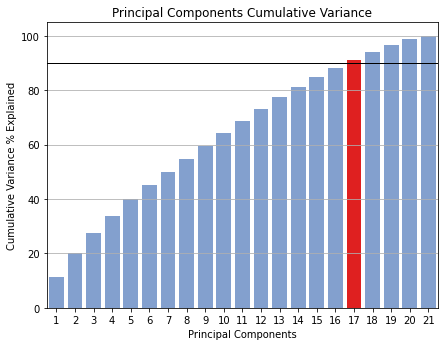

,srch_id,date_time,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17
0,1,2013-04-04 08:32:15,-1.011420,-0.513618,1.260491,-0.751886,-0.020210,-1.589186,1.903866,-0.910559,0.004010,0.283009,0.665373,0.464344,-1.049182,-0.968644,0.414413,0.633009,0.333681
1,1,2013-04-04 08:32:15,-0.870412,-0.424874,1.285058,-0.754792,0.346736,-1.697968,1.770414,-0.695931,0.007268,0.198573,0.249290,0.651757,-1.217136,-1.003131,0.462343,0.591512,-0.069880
2,1,2013-04-04 08:32:15,-1.104782,-0.362958,1.276977,-0.739716,-0.112691,-1.510716,1.786576,-0.307885,-0.129555,0.282970,0.322325,0.747606,-0.792574,-0.785290,0.437246,0.625709,0.301311
3,1,2013-04-04 08:32:15,-1.358823,-0.751690,1.206315,-0.768734,-0.709128,-1.459881,1.526094,-0.610882,-0.010295,-0.210821,1.247951,0.171054,-1.130515,-0.962003,0.680504,0.686473,0.526871
4,1,2013-04-04 08:32:15,-0.623181,0.119235,1.369884,-0.733314,0.663937,-1.327745,1.960914,0.392086,-0.335290,0.778995,-0.567894,1.266345,-0.657772,-0.600352,-0.326438,0.458707,0.299417


In [9]:
pca_df = pca_function(train_df, 90, show_scree_plot=True, excluded_cols=['srch_id'])
pca_df.head()

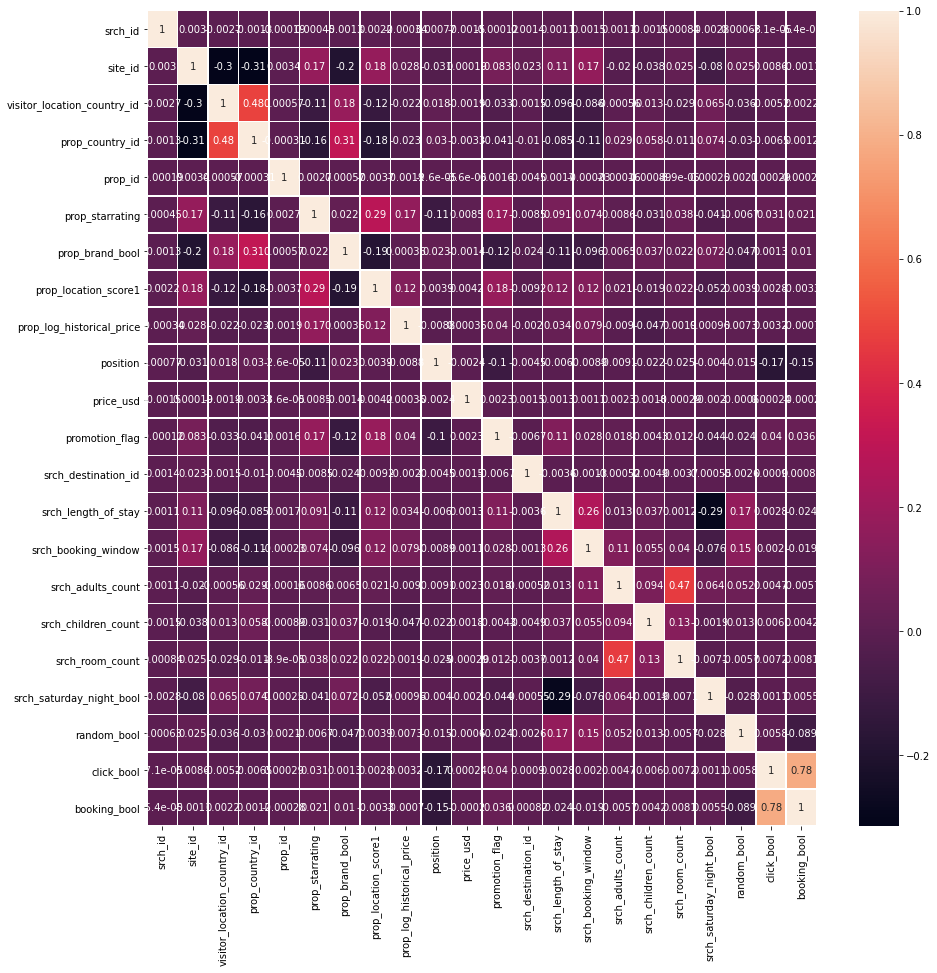

In [10]:
plt.figure(figsize = (15, 15))
sns.heatmap(train_df.corr(), annot = True, linewidths=.5)

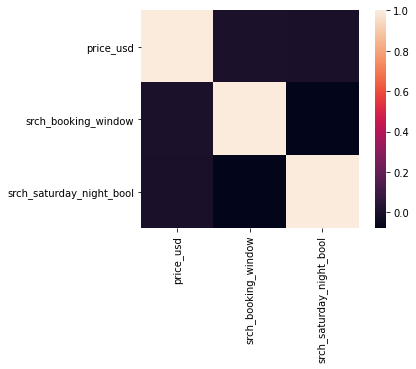

In [11]:
df = train_df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]

cor = df.corr()
sns.heatmap(cor, square = True)

In [0]:
#K means Clustering 

def doKmeans(X, nclust=2):
  from sklearn.cluster import KMeans
  model = KMeans(nclust)
  model.fit(X)
  clust_labels = model.predict(X)
  cent = model.cluster_centers_
  return (clust_labels, cent)

clust_labels, cent = doKmeans(train_df.drop(['srch_id', 'date_time'], axis=1), 17)
kmeans = pd.DataFrame(clust_labels)
df.insert((df.shape[1]),'kmeans',kmeans)

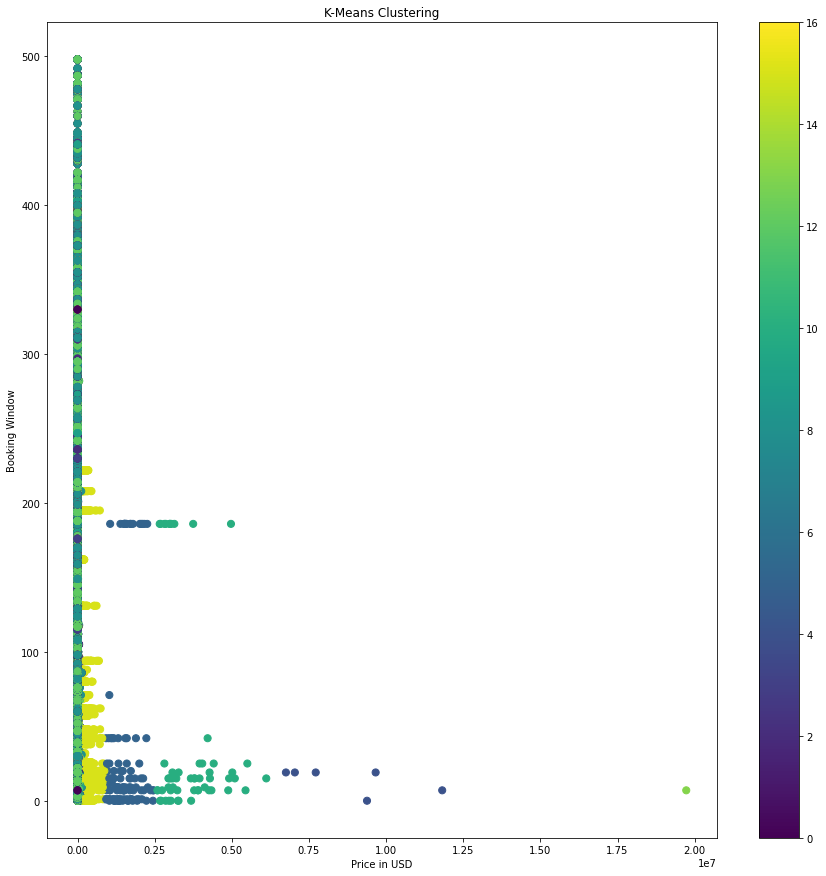

In [13]:
#Plot the clusters obtained using k means
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111)
scatter = ax.scatter(df['price_usd'],df['srch_booking_window'],c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Price in USD')
ax.set_ylabel('Booking Window')
plt.colorbar(scatter)